In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [89]:
import io

In [90]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [91]:
df = pd.read_csv(io.BytesIO(uploaded['TSLA.csv']))
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0     6/30/2010   1.719333   2.028000   1.553333   1.588667   1.588667   
1      7/1/2010   1.666667   1.728000   1.351333   1.464000   1.464000   
2      7/2/2010   1.533333   1.540000   1.247333   1.280000   1.280000   
3      7/6/2010   1.333333   1.333333   1.055333   1.074000   1.074000   
4      7/7/2010   1.093333   1.108667   0.998667   1.053333   1.053333   
...         ...        ...        ...        ...        ...        ...   
2512  6/23/2020  66.592003  67.466667  66.267334  66.785332  66.785332   
2513  6/24/2020  66.274002  66.725334  63.542667  64.056664  64.056664   
2514  6/25/2020  63.618000  65.732002  62.476665  65.732002  65.732002   
2515  6/26/2020  66.318665  66.333336  63.658001  63.982666  63.982666   
2516  6/29/2020  64.600670  67.333336  63.234669  67.290001  67.290001   

        Average  
0      1.695600  
1      1.534800  
2      1.376133  
3      1.174000  
4      1.061467  
...

In [92]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [93]:
data_training = data_training.drop(['Date'], axis = 1)

In [94]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[5.86706009e-04, 4.95404273e-04, 3.51870551e-04, 6.12891031e-04,
        6.12891031e-04, 4.97390889e-04],
       [2.98890786e-04, 9.38110673e-04, 3.40514396e-04, 1.04749439e-03,
        1.04749439e-03, 7.03900154e-04],
       [1.09593288e-03, 1.05406813e-03, 1.14640982e-03, 1.19236775e-03,
        1.19236775e-03, 1.10360217e-03],
       ...,
       [8.43912623e-01, 8.35903505e-01, 8.58221111e-01, 8.45526370e-01,
        8.45526370e-01, 8.50198635e-01],
       [7.85794970e-01, 7.58387701e-01, 7.36646115e-01, 7.34312507e-01,
        7.34312507e-01, 7.54105214e-01],
       [6.74762555e-01, 7.06475111e-01, 6.71403625e-01, 7.22043303e-01,
        7.22043303e-01, 7.03243984e-01]])

In [95]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [96]:
x_train.shape

(970, 20, 6)

In [97]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [98]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 6)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [99]:
regressorGRU.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_16 (GRU)                (None, 20, 60)            12240     
                                                                 
 dropout_16 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_17 (GRU)                (None, 20, 60)            21960     
                                                                 
 dropout_17 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_18 (GRU)                (None, 20, 80)            34080     
                                                                 
 dropout_18 (Dropout)        (None, 20, 80)            0         
                                                                 
 gru_19 (GRU)                (None, 120)              

In [100]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
31/31 [==============================] - 7s 55ms/step - loss: 0.0142
Epoch 2/50
31/31 [==============================] - 2s 63ms/step - loss: 0.0032
Epoch 3/50
31/31 [==============================] - 1s 44ms/step - loss: 0.0020
Epoch 4/50
31/31 [==============================] - 1s 43ms/step - loss: 0.0019
Epoch 5/50
31/31 [==============================] - 1s 44ms/step - loss: 0.0015
Epoch 6/50
31/31 [==============================] - 1s 43ms/step - loss: 0.0017
Epoch 7/50
31/31 [==============================] - 1s 44ms/step - loss: 0.0018
Epoch 8/50
31/31 [==============================] - 1s 43ms/step - loss: 0.0020
Epoch 9/50
31/31 [==============================] - 1s 43ms/step - loss: 0.0022
Epoch 10/50
31/31 [==============================] - 2s 75ms/step - loss: 0.0015
Epoch 11/50
31/31 [==============================] - 1s 44ms/step - loss: 0.0014
Epoch 12/50
31/31 [==============================] - 1s 43ms/step - loss: 0.0017
Epoch 13/50
31/31 [==================

In [101]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Average
0,6/30/2010,1.719333,2.028000,1.553333,1.588667,1.588667,1.695600
1,7/1/2010,1.666667,1.728000,1.351333,1.464000,1.464000,1.534800
2,7/2/2010,1.533333,1.540000,1.247333,1.280000,1.280000,1.376133
3,7/6/2010,1.333333,1.333333,1.055333,1.074000,1.074000,1.174000
4,7/7/2010,1.093333,1.108667,0.998667,1.053333,1.053333,1.061467


In [102]:
past_20_days = data_testing.tail(20)

In [103]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-103-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close,Average
0,59.646667,60.577332,58.066666,58.770668,58.770668,59.166400
1,59.208000,59.862667,58.673332,58.863998,58.863998,59.094399
2,59.325333,59.716667,57.229332,57.625332,57.625332,58.304399
3,58.522667,59.101334,57.746666,59.043999,59.043999,58.691733
4,61.266666,63.333332,60.610668,63.327999,63.327999,62.373333


In [104]:
inputs = scaler.transform(df)
inputs

array([[0.96811833, 0.93640834, 0.96592583, 0.96003884, 0.96003884,
        0.96299267],
       [0.96083425, 0.92510881, 0.97625476, 0.9615989 , 0.9615989 ,
        0.96179357],
       [0.96278257, 0.92280042, 0.95166962, 0.94089396, 0.94089396,
        0.94863693],
       ...,
       [1.03406249, 1.01790853, 1.04100924, 1.07640111, 1.07640111,
        1.05445186],
       [1.07890715, 1.02741619, 1.06112233, 1.04716006, 1.04716006,
        1.05773157],
       [1.05037977, 1.04322713, 1.0539148 , 1.10244387, 1.10244387,
        1.07596215]])

In [105]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((1487, 20, 6), (1487,))

In [106]:
x_test.shape

(1487, 20, 6)

In [107]:
y_pred = regressorGRU.predict(x_test)

47/47 [==============================] - 1s 13ms/step


In [108]:
scaler.scale_

array([0.01660504, 0.01581094, 0.01702572, 0.01671551, 0.01671551,
       0.01665397])

In [109]:
scale = 1 / 0.01660504
scale

60.22267937927279

In [110]:
y_pred = y_pred * scale
y_test = y_test * scale

In [111]:
y_pred.shape

(1487, 1)

In [112]:
y_test.shape

(1487,)

In [113]:
y_pred[1418:]

array([[25.919437],
       [26.001745],
       [27.513344],
       [29.584946],
       [30.559057],
       [30.40769 ],
       [30.05473 ],
       [30.277773],
       [29.798834],
       [28.861076],
       [28.826427],
       [29.546057],
       [30.84858 ],
       [31.574186],
       [32.399147],
       [34.56474 ],
       [37.979572],
       [39.973724],
       [40.85866 ],
       [41.887516],
       [41.973503],
       [41.045383],
       [41.1428  ],
       [41.115067],
       [41.24494 ],
       [43.158424],
       [43.797043],
       [44.461075],
       [45.111446],
       [43.05476 ],
       [42.71791 ],
       [43.769375],
       [44.208893],
       [44.355766],
       [45.302284],
       [45.539597],
       [45.926132],
       [45.54015 ],
       [45.280872],
       [45.321568],
       [45.978756],
       [46.005417],
       [46.15738 ],
       [46.378883],
       [46.403633],
       [46.519127],
       [46.38424 ],
       [46.1548  ],
       [46.55898 ],
       [48.59028 ],


In [114]:
y_test[1418:]

array([27.56267412, 30.47600677, 35.00600578, 35.14867581, 32.32267518,
       32.67334126, 32.07267513, 32.25600517, 30.72467483, 32.62267425,
       32.73600927, 34.98933977, 35.60267491, 36.12867603, 38.00001044,
       45.25401005, 48.12267769, 46.45201132, 50.14134314, 47.50267855,
       47.33067752, 45.58800913, 47.16267848, 46.04334323, 47.83001063,
       51.69867849, 51.3340124 , 55.66868137, 48.98934288, 45.38934408,
       51.3086794 , 50.4226772 , 50.47001021, 51.57401046, 51.35667941,
       53.78934295, 53.37801186, 50.65601125, 51.34601041, 53.84134496,
       53.00067777, 53.35601285, 53.05601379, 53.46734488, 54.28934306,
       53.38001086, 52.89001275, 52.57267968, 55.85601341, 58.30267995,
       57.86401286, 57.98134588, 57.1786797 , 59.92267931, 61.32334562,
       64.78135039, 64.66935037, 63.98935022, 59.84201429, 66.11267969,
       64.50335033, 65.52268356, 66.1746837 , 65.31934451, 65.2480175 ,
       64.93001643, 62.27401384, 64.97467943, 63.25668405])

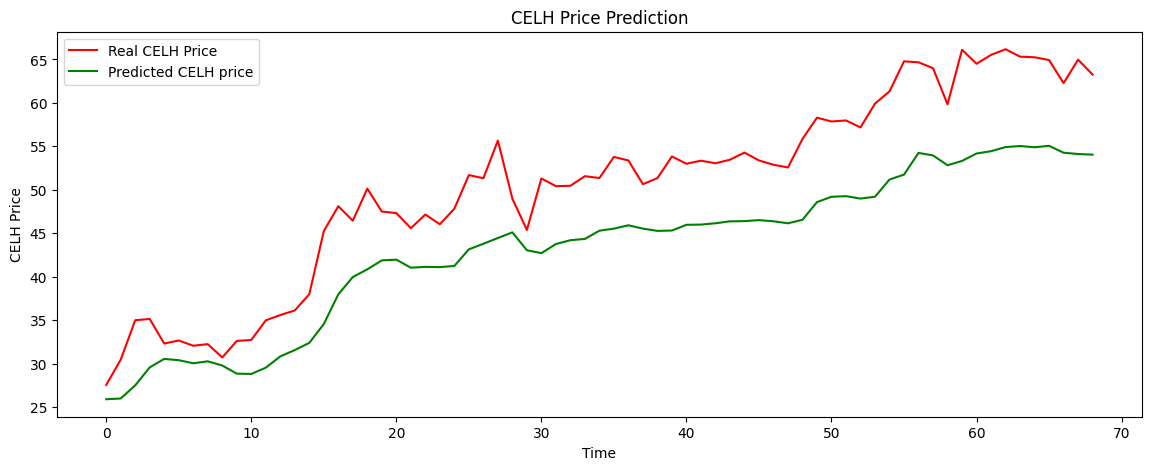

In [115]:
plt.figure(figsize = (14,5))
plt.plot(y_test[1418:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[1418:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()